1.Write a regex to extract all the numbers with orange color background from the below text in italics.


{"orders":[{"id":1},{"id":2},{"id":3},{"id":4},{"id":5},{"id":6},{"id":7},{"id":8},{"id":9},{"id":10},{"id":11},{"id":648},{"id":649},{"id":650},{"id":651},{"id":652},{"id":653}],"errors":[{"code":3,"message":"[PHP Warning #2] count(): Parameter must be an array or an object that implements Countable (153)"}]}


In [1]:
x={"orders":[{"id":1},{"id":2},{"id":3},{"id":4},{"id":5},{"id":6},{"id":7},{"id":8},{"id":9},{"id":10},{"id":11},{"id":648},{"id":649},{"id":650},{"id":651},{"id":652},{"id":653}],"errors":[{"code":3,"message":"[PHP Warning #2] count(): Parameter must be an array or an object that implements Countable (153)"}]}

In [2]:
list = []
for i in x.values():
    for j in i:
        for k in j.values():
            if type(k) == int:
                list.append(k)

print(list)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 648, 649, 650, 651, 652, 653, 3]


# Qus_2

In [3]:
import pandas as pd
import numpy as np

In [4]:
data = pd.read_csv(r'C:\Users\ASUS-PC\Downloads\chrome_reviews.csv')
data.head()

,ID,Review URL,Text,Star,Thumbs Up,User Name,Developer Reply,Version,Review Date,App ID
0,3886,https://play.google.com/store/apps/details?id=...,This is very helpfull aap.,5,0,INDIAN Knowledge,NaN,83.0.4103.106,2020-12-19,com.android.chrome
1,3887,https://play.google.com/store/apps/details?id=...,Good,3,2,Ijeoma Happiness,NaN,85.0.4183.127,2020-12-19,com.android.chrome
2,3888,https://play.google.com/store/apps/details?id=...,Not able to update. Neither able to uninstall.,1,0,Priti D BtCFs-29,NaN,85.0.4183.127,2020-12-19,com.android.chrome
3,3889,https://play.google.com/store/apps/details?id=...,Nice app,4,0,Ajeet Raja,NaN,77.0.3865.116,2020-12-19,com.android.chrome
4,3890,https://play.google.com/store/apps/details?id=...,Many unwanted ads,1,0,Rams Mp,NaN,87.0.4280.66,2020-12-19,com.android.chrome


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7204 entries, 0 to 7203
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ID               7204 non-null   int64 
 1   Review URL       7204 non-null   object
 2   Text             7203 non-null   object
 3   Star             7204 non-null   int64 
 4   Thumbs Up        7204 non-null   int64 
 5   User Name        7204 non-null   object
 6   Developer Reply  95 non-null     object
 7   Version          7119 non-null   object
 8   Review Date      7204 non-null   object
 9   App ID           7204 non-null   object
dtypes: int64(3), object(7)
memory usage: 562.9+ KB


In [6]:
data=data[["ID","User Name","Text","Star"]]
data.head()

,ID,User Name,Text,Star
0,3886,INDIAN Knowledge,This is very helpfull aap.,5
1,3887,Ijeoma Happiness,Good,3
2,3888,Priti D BtCFs-29,Not able to update. Neither able to uninstall.,1
3,3889,Ajeet Raja,Nice app,4
4,3890,Rams Mp,Many unwanted ads,1


In [7]:
data.isnull().sum()

ID           0
User Name    0
Text         1
Star         0
dtype: int64

In [8]:
data.dropna()

,ID,User Name,Text,Star
0,3886,INDIAN Knowledge,This is very helpfull aap.,5
1,3887,Ijeoma Happiness,Good,3
2,3888,Priti D BtCFs-29,Not able to update. Neither able to uninstall.,1
3,3889,Ajeet Raja,Nice app,4
4,3890,Rams Mp,Many unwanted ads,1
...,...,...,...,...
7199,684987,boima panjaitan,Bagusss..,5
7200,684988,निशान्त सिंह,Bad version 😔,1
7201,684989,Virgie Allen,One thing that I have to say I can't spelled t...,5
7202,684990,Kazuo Guevarra,Excellent,5


In [9]:
import nltk
import re
nltk.download('stopwords')
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to C:\Users\ASUS-
[nltk_data]     PC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
ps=PorterStemmer()
def clean_text(text):
    text=re.sub('[^a-zA-Z]', " ", text)
    text=text.lower()
    text=text.split()
    text=[ps.stem(word)for word in text if word not in stopwords.words('english')]
    text=' '.join(text)
    return text
clean = lambda x: clean_text(str(x))

In [11]:
data['Text'] = data['Text'].apply(clean)

In [12]:
data.head()

,ID,User Name,Text,Star
0,3886,INDIAN Knowledge,helpful aap,5
1,3887,Ijeoma Happiness,good,3
2,3888,Priti D BtCFs-29,abl updat neither abl uninstal,1
3,3889,Ajeet Raja,nice app,4
4,3890,Rams Mp,mani unwant ad,1


In [13]:
data["Length"] = data["Text"].apply(lambda x:len(str(x)))
data.head()

,ID,User Name,Text,Star,Length
0,3886,INDIAN Knowledge,helpful aap,5,11
1,3887,Ijeoma Happiness,good,3,4
2,3888,Priti D BtCFs-29,abl updat neither abl uninstal,1,30
3,3889,Ajeet Raja,nice app,4,8
4,3890,Rams Mp,mani unwant ad,1,14


In [14]:
from textblob import TextBlob
def get_polarity(data):
    return TextBlob(data).sentiment.polarity

In [15]:
data['TextBlob_polarity']=data['Text'].apply(get_polarity)

In [16]:
data

,ID,User Name,Text,Star,Length,TextBlob_polarity
0,3886,INDIAN Knowledge,helpful aap,5,11,0.00
1,3887,Ijeoma Happiness,good,3,4,0.70
2,3888,Priti D BtCFs-29,abl updat neither abl uninstal,1,30,0.00
3,3889,Ajeet Raja,nice app,4,8,0.60
4,3890,Rams Mp,mani unwant ad,1,14,0.00
...,...,...,...,...,...,...
7199,684987,boima panjaitan,bagusss,5,7,0.00
7200,684988,निशान्त सिंह,bad version,1,11,-0.70
7201,684989,Virgie Allen,one thing say spell good problem tri spell best,5,47,0.85
7202,684990,Kazuo Guevarra,excel,5,5,0.00


In [17]:
data.drop(data.columns[-1],axis=1)

,ID,User Name,Text,Star,Length
0,3886,INDIAN Knowledge,helpful aap,5,11
1,3887,Ijeoma Happiness,good,3,4
2,3888,Priti D BtCFs-29,abl updat neither abl uninstal,1,30
3,3889,Ajeet Raja,nice app,4,8
4,3890,Rams Mp,mani unwant ad,1,14
...,...,...,...,...,...
7199,684987,boima panjaitan,bagusss,5,7
7200,684988,निशान्त सिंह,bad version,1,11
7201,684989,Virgie Allen,one thing say spell good problem tri spell best,5,47
7202,684990,Kazuo Guevarra,excel,5,5


In [18]:
def get_Analysis(score):
    if score < 0:
        return 'Negative'
    elif score==0:
        return 'Neutral'
    else:
        return 'Positive'

In [19]:
data['TextBlob_Analysis']= data['TextBlob_polarity'].apply(get_Analysis)
data

,ID,User Name,Text,Star,Length,TextBlob_polarity,TextBlob_Analysis
0,3886,INDIAN Knowledge,helpful aap,5,11,0.00,Neutral
1,3887,Ijeoma Happiness,good,3,4,0.70,Positive
2,3888,Priti D BtCFs-29,abl updat neither abl uninstal,1,30,0.00,Neutral
3,3889,Ajeet Raja,nice app,4,8,0.60,Positive
4,3890,Rams Mp,mani unwant ad,1,14,0.00,Neutral
...,...,...,...,...,...,...,...
7199,684987,boima panjaitan,bagusss,5,7,0.00,Neutral
7200,684988,निशान्त सिंह,bad version,1,11,-0.70,Negative
7201,684989,Virgie Allen,one thing say spell good problem tri spell best,5,47,0.85,Positive
7202,684990,Kazuo Guevarra,excel,5,5,0.00,Neutral


In [20]:
data["TextBlob_Analysis"].value_counts()

Positive    3445
Neutral     3283
Negative     476
Name: TextBlob_Analysis, dtype: int64

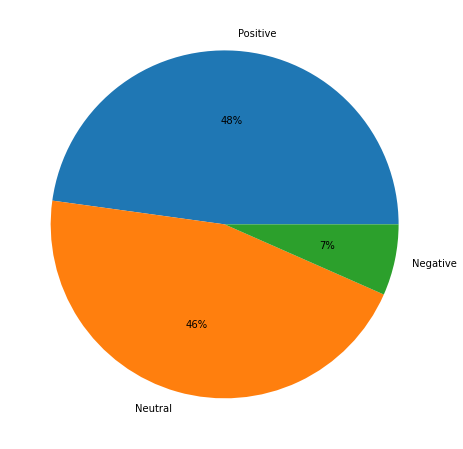

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.pie(data["TextBlob_Analysis"].value_counts(), labels = data["TextBlob_Analysis"].value_counts().index, autopct="%.0f%%")
plt.show()

In [22]:
data['point_users']=np.where((data.TextBlob_Analysis == "Positive") & (data.Star == 1),'point_users',0)

In [23]:
data.head()

,ID,User Name,Text,Star,Length,TextBlob_polarity,TextBlob_Analysis,point_users
0,3886,INDIAN Knowledge,helpful aap,5,11,0.0,Neutral,0
1,3887,Ijeoma Happiness,good,3,4,0.7,Positive,0
2,3888,Priti D BtCFs-29,abl updat neither abl uninstal,1,30,0.0,Neutral,0
3,3889,Ajeet Raja,nice app,4,8,0.6,Positive,0
4,3890,Rams Mp,mani unwant ad,1,14,0.0,Neutral,0


In [24]:
data['point_users'].value_counts()

0              6840
point_users     364
Name: point_users, dtype: int64

In [25]:
# here i concluded that 364 users gives positive review but 1-star rating.

# qus 3

In [26]:
import pandas as pd
import seaborn as sns
df=pd.read_csv(r'C:\Users\ASUS-PC\Downloads\browser_rankings_data.csv')

In [27]:
df.columns

Index(['ID', 'Keyword', 'Rank', 'Country', 'Language', 'Date', 'App ID',
       'Date of Last Description Change', 'Short Description',
       'Long Description'],
      dtype='object')

In [28]:
df.head()

,ID,Keyword,Rank,Country,Language,Date,App ID,Date of Last Description Change,Short Description,Long Description
0,1,browser,2.0,in,en,16-12-2020,net.fast.web.browser,18-12-2020,"The small, fastest, secure Web Browser, best m...","One of the smallest, fastest, secure Web Brows..."
1,2,browser,3.0,in,en,16-12-2020,com.android.chrome,18-12-2020,"Fast, simple, and secure. Google Chrome browse...","Google Chrome is a fast, easy to use, and secu..."
2,3,browser,4.0,in,en,16-12-2020,com.opera.browser,27-02-2021,"Fast, safe web browser: free VPN, Ad blocker, ...","Fast, safe and private, introducing the latest..."
3,3,browser,4.0,in,en,16-12-2020,com.opera.browser,18-12-2020,"Fast, safe web browser: free VPN, Ad blocker, ...","Opera is a fast, safe web browser for your And..."
4,4,browser,1.0,in,en,16-12-2020,com.cloudmosa.puffinTV,07-02-2021,Puffin TV Browser - One App to Watch All Video...,Puffin TV Browser is a special edition of Puff...


In [29]:
print(df['App ID'].nunique())
print(df['Long Description'].nunique())
print(df['Short Description'].nunique())

8
13
9


In [30]:
df1=df[['Rank','Short Description']]

In [31]:
df1=pd.get_dummies(df1)
df1.head()

,Rank,"Short Description_Browse the web privately, search anonymously, and escape ad trackers.","Short Description_Fast &amp; private web browser with ad blocker, sync, dark &amp; private mode.","Short Description_Fast, safe web browser: free VPN, Ad blocker, QR-code reader &amp; personalized news","Short Description_Fast, simple, and secure. Google Chrome browser for Android phones and tablets.","Short Description_Free, safe internet browser! Private browsing, search engine &amp; pop-up blocker.","Short Description_Funny video, Football &amp; celebrity news, Fast &amp; data-saving browser.",Short Description_Puffin TV Browser - One App to Watch All Videos on the Web,Short Description_Puffin TV Browser - One App to Watch All Videos on the Web.,"Short Description_The small, fastest, secure Web Browser, best mobile browser, fast search Google."
0,2.0,0,0,0,0,0,0,0,0,1
1,3.0,0,0,0,1,0,0,0,0,0
2,4.0,0,0,1,0,0,0,0,0,0
3,4.0,0,0,1,0,0,0,0,0,0
4,1.0,0,0,0,0,0,0,1,0,0


In [32]:
df1.corr()

,Rank,"Short Description_Browse the web privately, search anonymously, and escape ad trackers.","Short Description_Fast &amp; private web browser with ad blocker, sync, dark &amp; private mode.","Short Description_Fast, safe web browser: free VPN, Ad blocker, QR-code reader &amp; personalized news","Short Description_Fast, simple, and secure. Google Chrome browser for Android phones and tablets.","Short Description_Free, safe internet browser! Private browsing, search engine &amp; pop-up blocker.","Short Description_Funny video, Football &amp; celebrity news, Fast &amp; data-saving browser.",Short Description_Puffin TV Browser - One App to Watch All Videos on the Web,Short Description_Puffin TV Browser - One App to Watch All Videos on the Web.,"Short Description_The small, fastest, secure Web Browser, best mobile browser, fast search Google."
Rank,1.000000,-0.181225,0.775795,-0.141335,-0.051519,-0.183369,0.165066,-0.155499,-0.155499,-0.083249
"Short Description_Browse the web privately, search anonymously, and escape ad trackers.",-0.181225,1.000000,-0.208955,-0.187127,-0.128821,-0.208955,-0.208955,-0.187127,-0.187127,-0.128821
"Short Description_Fast &amp; private web browser with ad blocker, sync, dark &amp; private mode.",0.775795,-0.208955,1.000000,-0.122904,-0.084609,-0.137240,-0.137240,-0.122904,-0.122904,-0.084609
"Short Description_Fast, safe web browser: free VPN, Ad blocker, QR-code reader &amp; personalized news",-0.141335,-0.187127,-0.122904,1.000000,-0.075771,-0.122904,-0.122904,-0.110065,-0.110065,-0.075771
"Short Description_Fast, simple, and secure. Google Chrome browser for Android phones and tablets.",-0.051519,-0.128821,-0.084609,-0.075771,1.000000,-0.084609,-0.084609,-0.075771,-0.075771,-0.052162
"Short Description_Free, safe internet browser! Private browsing, search engine &amp; pop-up blocker.",-0.183369,-0.208955,-0.137240,-0.122904,-0.084609,1.000000,-0.137240,-0.122904,-0.122904,-0.084609
"Short Description_Funny video, Football &amp; celebrity news, Fast &amp; data-saving browser.",0.165066,-0.208955,-0.137240,-0.122904,-0.084609,-0.137240,1.000000,-0.122904,-0.122904,-0.084609
Short Description_Puffin TV Browser - One App to Watch All Videos on the Web,-0.155499,-0.187127,-0.122904,-0.110065,-0.075771,-0.122904,-0.122904,1.000000,-0.110065,-0.075771
Short Description_Puffin TV Browser - One App to Watch All Videos on the Web.,-0.155499,-0.187127,-0.122904,-0.110065,-0.075771,-0.122904,-0.122904,-0.110065,1.000000,-0.075771
"Short Description_The small, fastest, secure Web Browser, best mobile browser, fast search Google.",-0.083249,-0.128821,-0.084609,-0.075771,-0.052162,-0.084609,-0.084609,-0.075771,-0.075771,1.000000


<AxesSubplot:>

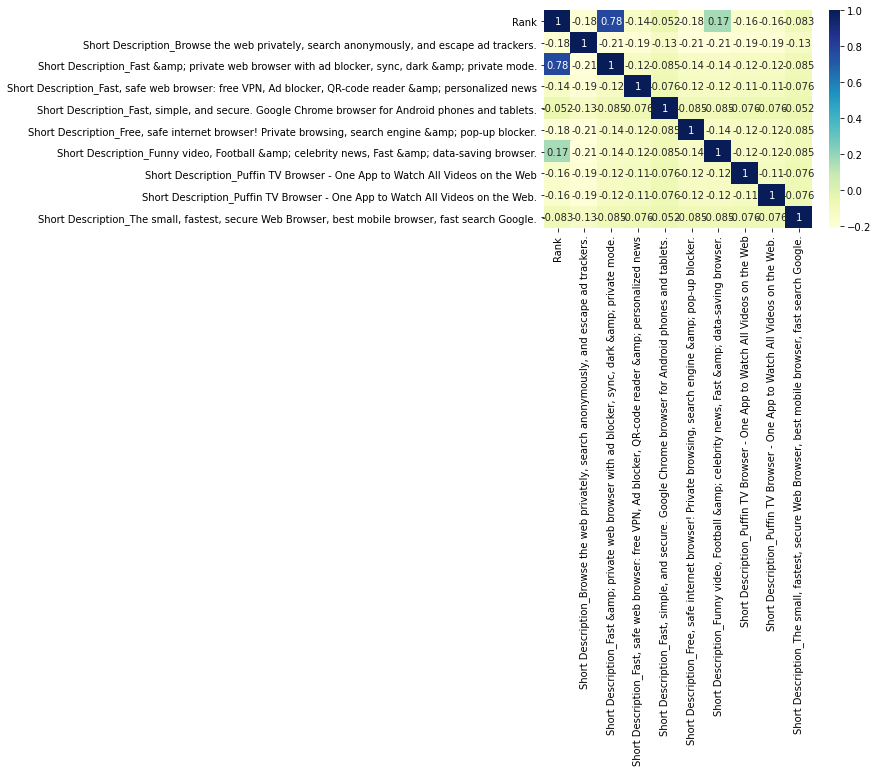

In [33]:
sns.heatmap(df1.corr(),annot=True,cmap ="YlGnBu")

# here  keyword rankings is strongly correlated with Short Description_Fast &amp; private web browser with ad blocker, sync, dark &amp; private mode. 

In [34]:
df2=df[['Rank','Long Description']]

In [35]:
df2=pd.get_dummies(df2)
df2.head()

,Rank,"Long Description_Fast, safe and private, introducing the latest version of the Opera web browser made to make your life easier online. Featuring a built-in Ad Blocker and Free VPN with a clean and user-friendly design letting you get more done online, in less time. Download now and join over 350 million fans across the world using Opera.\r\n\r\n Ad blocker for safe & fast browsing \r\nOpera’s native ad blocker effectively helps you get rid of thousands of intrusive ads and loads your pages faster to streamline your browsing experience. Now, we have added the option to eliminate a vast majority of annoying cookie and privacy dialogs also. \r\n\r\nFree built-in VPN \r\nImprove your privacy and security on public networks with our built-in browser VPN. The unlimited and free VPN lets you avoid sharing your location and identity, staying anonymous and safe online. You can also switch to different virtual locations if needed for extra browser security. \r\n\r\nPrivate browser \r\nUse private tabs to go incognito anywhere on the Internet without leaving a trace on your device. Easily switch between normal and private browsing in the tab gallery.\r\n\r\nSave data and time\r\nOn a slow connection? Or want to save data? Switch to data saver mode to load pages faster than ever on slow networks. Powered by our famous compression technology, the Opera browser works hard to save up to of your data without breaking your browsing experience.\r\n\r\nPersonalized news feed \r\nPowered by our smartest AI news engine, the rebooted news feed allows you to swipe through a selection of personalized news channels within the browser, subscribe to your favorite topics, and save stories to read later.\r\n\r\nNight mode\r\nOpera’s night mode provides you adjustable lighting options to get the most comfortable reading experience in the dark and the least eye strain. Night mode is easily accessible from the main menu. \r\n\r\nManage your passwords and autofill credit cards\r\nOpt in for automatic saving of passwords site by site and safely autofill your payment information for safe and private online shopping. \r\n\r\nRead comfortably on any screen: \r\nThe Opera browser includes a text size setting which helps you adapt pages according to your reading preferences. More importantly, it works perfectly together with our automatic text wrap feature for an unparalleled reading experience.\r\n\r\nFlow - seamlessly connects all your devices: \r\nThe popular Flow feature lets the files, links or images that you share immediately appear on all your Flow-enabled devices, allowing you to seamlessly switch between your iPhone, Android phone, tablet and computer. Sync all your Opera accounts across Devices as well! \r\n\r\nAbout Opera\r\nFounded 1995 in Norway on the idea that everyone should be able to browse the web, we have spent the last +25 years helping millions of people access the internet in a safe, private and innovative way. We care about the internet, about open standards, and about people. \r\n\r\nTerms & Conditions:\r\nBy downloading this application, you are agreeing to the End User Licence Agreement at https://www.opera.com/eula/mobile.","Long Description_Google Chrome is a fast, easy to use, and secure web browser. Designed for Android, Chrome brings you personalized news articles, quick links to your favorite sites, downloads, and Google Search and Google Translate built-in. Download now to enjoy the same Chrome web browser experience you love across all your devices.\r\n \r\n Browse fast and type less. Choose from personalized search results that instantly appear as you type and quickly browse previously visited web pages. Fill in forms quickly with Autofill.\r\n \r\n Incognito Browsing. Use Incognito mode to browse the internet without saving your history. Browse privately across all your devices.\r\n \r\n Sync Chrome Across Devices. When you sign into Chrome, your bookmarks, passwords, and settings will be automatically synced across all 

In [36]:
df2.corr()

,Rank,"Long Description_Fast, safe and private, introducing the latest version of the Opera web browser made to make your life easier online. Featuring a built-in Ad Blocker and Free VPN with a clean and user-friendly design letting you get more done online, in less time. Download now and join over 350 million fans across the world using Opera.\r\n\r\n Ad blocker for safe & fast browsing \r\nOpera’s native ad blocker effectively helps you get rid of thousands of intrusive ads and loads your pages faster to streamline your browsing experience. Now, we have added the option to eliminate a vast majority of annoying cookie and privacy dialogs also. \r\n\r\nFree built-in VPN \r\nImprove your privacy and security on public networks with our built-in browser VPN. The unlimited and free VPN lets you avoid sharing your location and identity, staying anonymous and safe online. You can also switch to different virtual locations if needed for extra browser security. \r\n\r\nPrivate browser \r\nUse private tabs to go incognito anywhere on the Internet without leaving a trace on your device. Easily switch between normal and private browsing in the tab gallery.\r\n\r\nSave data and time\r\nOn a slow connection? Or want to save data? Switch to data saver mode to load pages faster than ever on slow networks. Powered by our famous compression technology, the Opera browser works hard to save up to of your data without breaking your browsing experience.\r\n\r\nPersonalized news feed \r\nPowered by our smartest AI news engine, the rebooted news feed allows you to swipe through a selection of personalized news channels within the browser, subscribe to your favorite topics, and save stories to read later.\r\n\r\nNight mode\r\nOpera’s night mode provides you adjustable lighting options to get the most comfortable reading experience in the dark and the least eye strain. Night mode is easily accessible from the main menu. \r\n\r\nManage your passwords and autofill credit cards\r\nOpt in for automatic saving of passwords site by site and safely autofill your payment information for safe and private online shopping. \r\n\r\nRead comfortably on any screen: \r\nThe Opera browser includes a text size setting which helps you adapt pages according to your reading preferences. More importantly, it works perfectly together with our automatic text wrap feature for an unparalleled reading experience.\r\n\r\nFlow - seamlessly connects all your devices: \r\nThe popular Flow feature lets the files, links or images that you share immediately appear on all your Flow-enabled devices, allowing you to seamlessly switch between your iPhone, Android phone, tablet and computer. Sync all your Opera accounts across Devices as well! \r\n\r\nAbout Opera\r\nFounded 1995 in Norway on the idea that everyone should be able to browse the web, we have spent the last +25 years helping millions of people access the internet in a safe, private and innovative way. We care about the internet, about open standards, and about people. \r\n\r\nTerms & Conditions:\r\nBy downloading this application, you are agreeing to the End User Licence Agreement at https://www.opera.com/eula/mobile.","Long Description_Google Chrome is a fast, easy to use, and secure web browser. Designed for Android, Chrome brings you personalized news articles, quick links to your favorite sites, downloads, and Google Search and Google Translate built-in. Download now to enjoy the same Chrome web browser experience you love across all your devices.\r\n \r\n Browse fast and type less. Choose from personalized search results that instantly appear as you type and quickly browse previously visited web pages. Fill in forms quickly with Autofill.\r\n \r\n Incognito Browsing. Use Incognito mode to browse the internet without saving your history. Browse privately across all your devices.\r\n \r\n Sync Chrome Across Devices. When you sign into Chrome, your bookmarks, passwords, and settings will be automatically synced across all 

# here Long Description_Vivaldi.....more about Vivaldi browser and our mission by visiting https://vivaldi.com is highly correlated with keyword_ranking.

C:\Users\ASUS-PC\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ASUS-PC\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 12289 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ASUS-PC\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 128274 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ASUS-PC\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 128584 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ASUS-PC\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 128640 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ASUS-PC\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 128683 m

<AxesSubplot:>

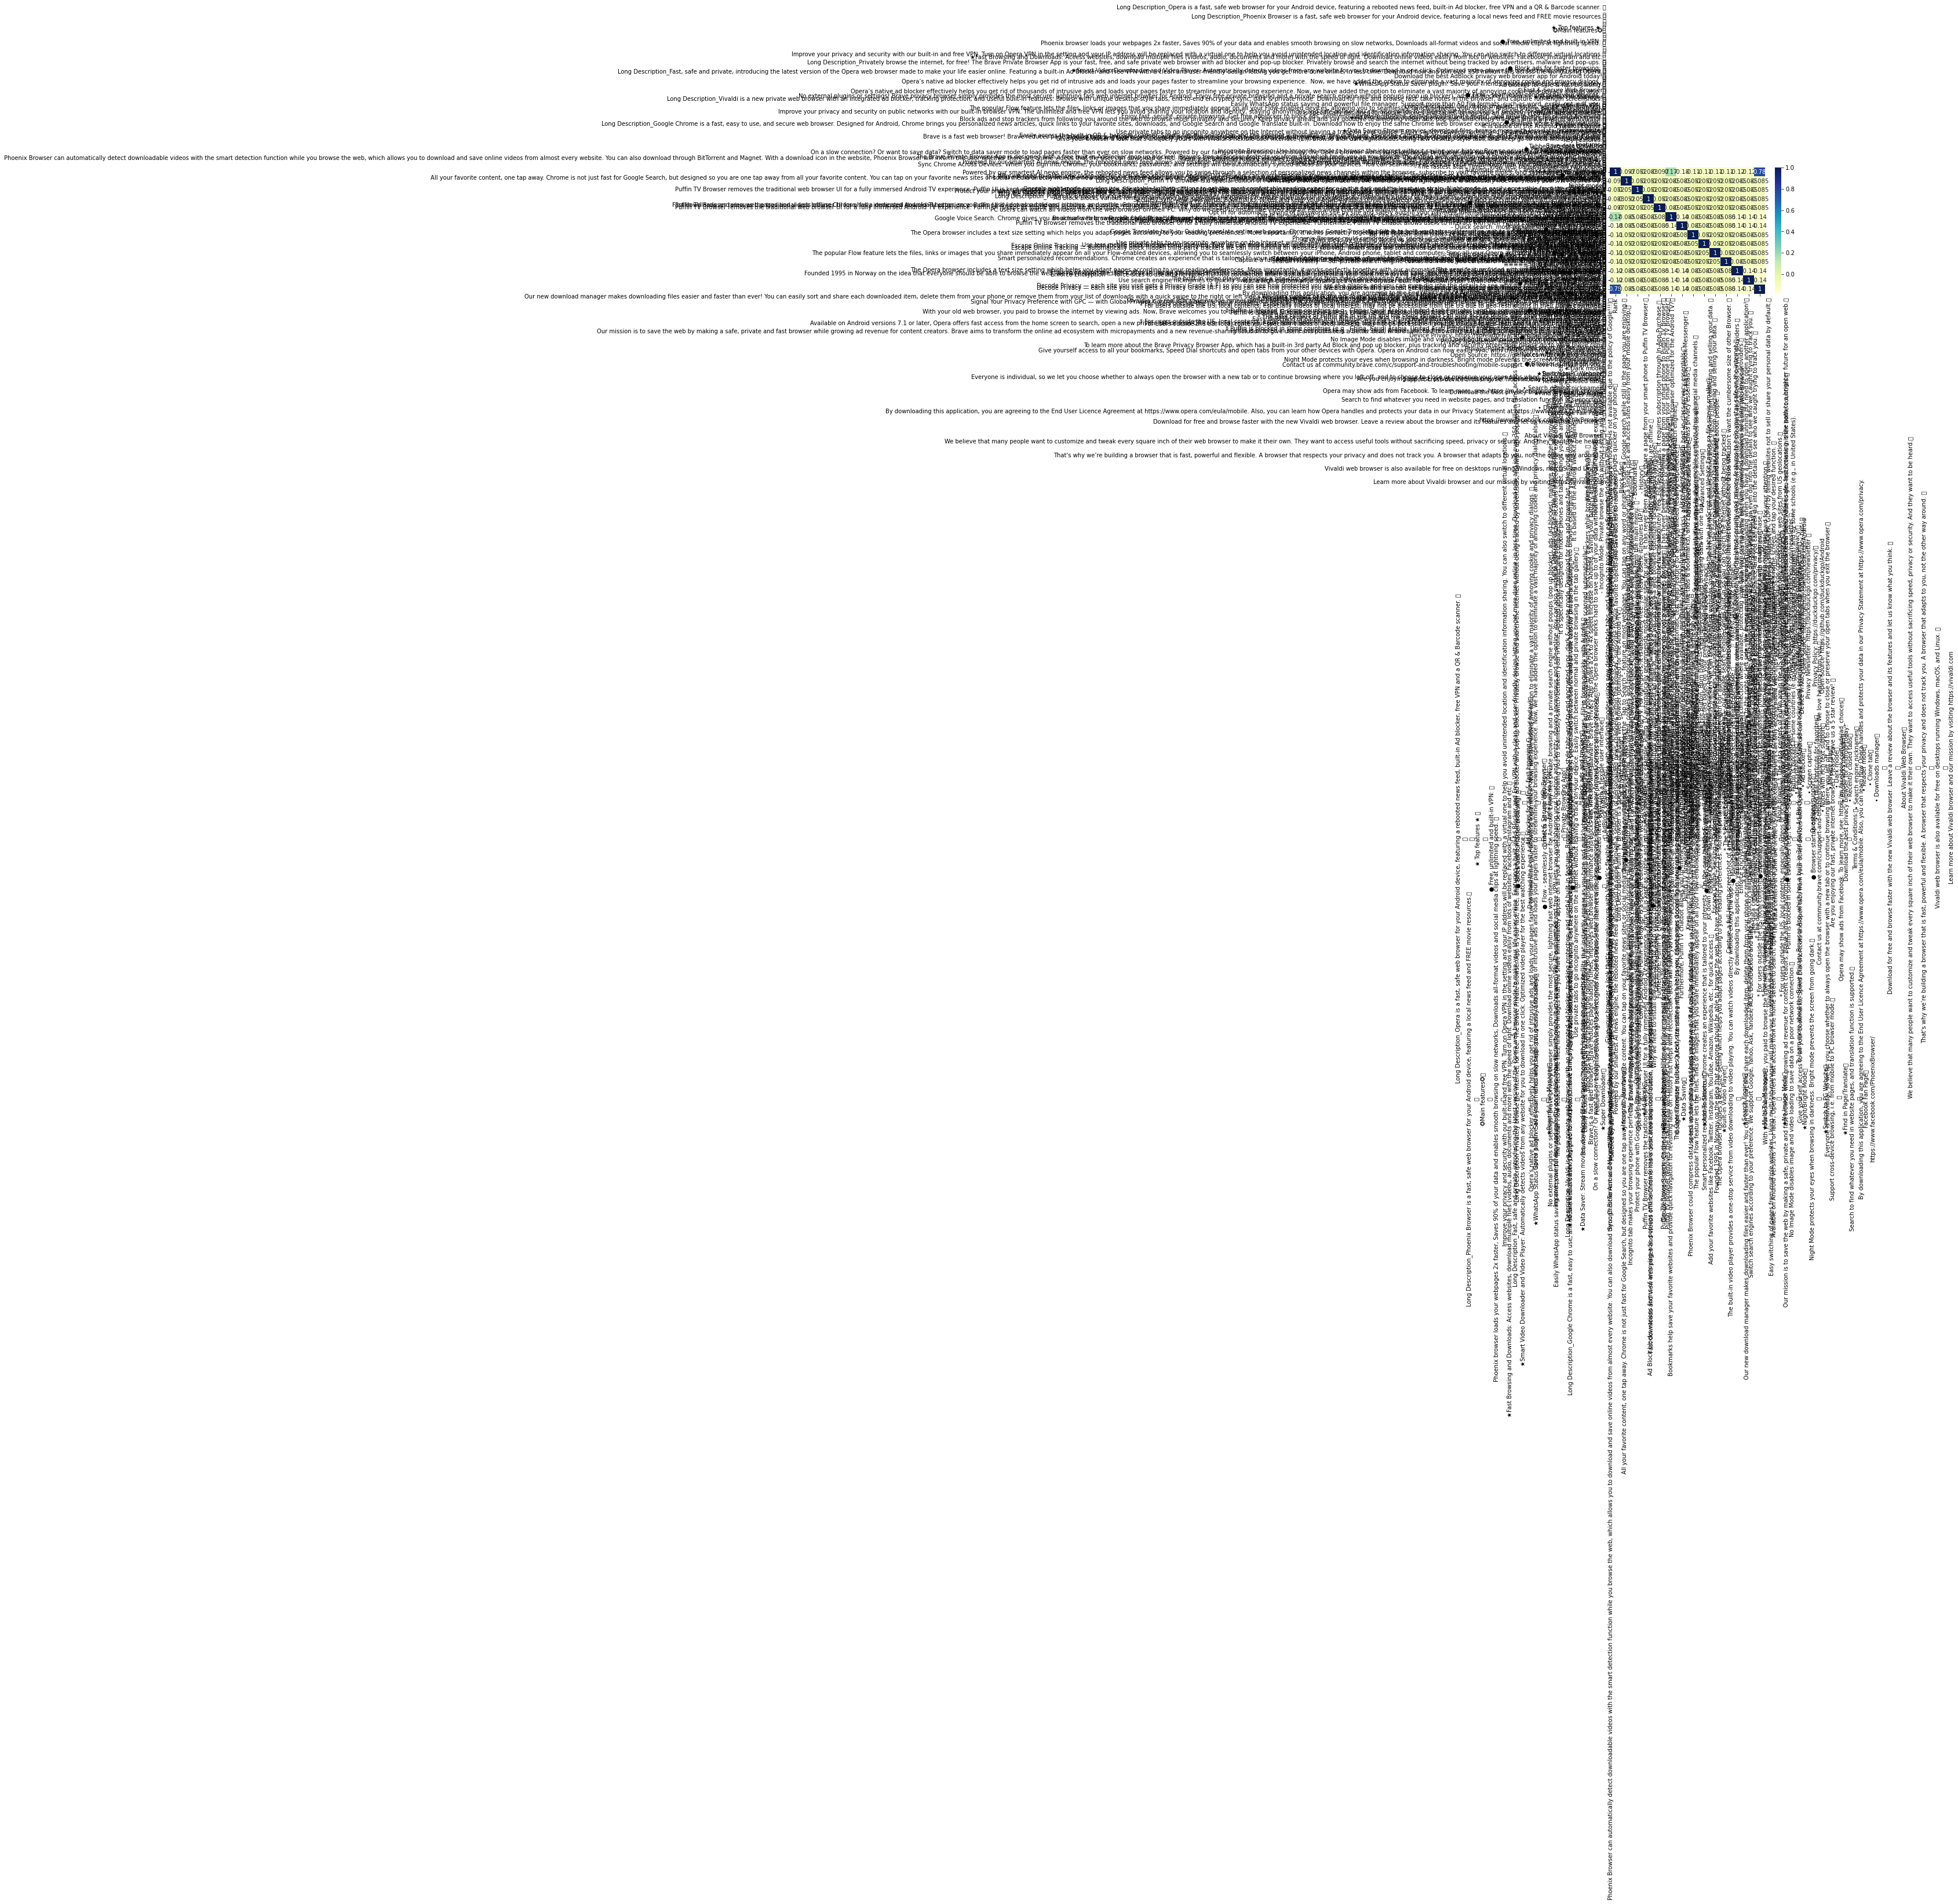

In [37]:
sns.heatmap(df2.corr(),annot=True,cmap ="YlGnBu")

In [38]:
df3=df[['Rank','App ID']]
df3=pd.get_dummies(df3)
df3.head()

,Rank,App ID_com.android.chrome,App ID_com.brave.browser,App ID_com.cloudmosa.puffinTV,App ID_com.duckduckgo.mobile.android,App ID_com.opera.browser,App ID_com.transsion.phoenix,App ID_com.vivaldi.browser,App ID_net.fast.web.browser
0,2.0,0,0,0,0,0,0,0,1
1,3.0,1,0,0,0,0,0,0,0
2,4.0,0,0,0,0,1,0,0,0
3,4.0,0,0,0,0,1,0,0,0
4,1.0,0,0,1,0,0,0,0,0


In [39]:
df3.corr()

,Rank,App ID_com.android.chrome,App ID_com.brave.browser,App ID_com.cloudmosa.puffinTV,App ID_com.duckduckgo.mobile.android,App ID_com.opera.browser,App ID_com.transsion.phoenix,App ID_com.vivaldi.browser,App ID_net.fast.web.browser
Rank,1.000000,-0.051519,-0.183369,-0.233195,-0.181225,-0.141335,0.165066,0.775795,-0.083249
App ID_com.android.chrome,-0.051519,1.000000,-0.084609,-0.113589,-0.128821,-0.075771,-0.084609,-0.084609,-0.052162
App ID_com.brave.browser,-0.183369,-0.084609,1.000000,-0.184248,-0.208955,-0.122904,-0.137240,-0.137240,-0.084609
App ID_com.cloudmosa.puffinTV,-0.233195,-0.113589,-0.184248,1.000000,-0.280525,-0.165001,-0.184248,-0.184248,-0.113589
App ID_com.duckduckgo.mobile.android,-0.181225,-0.128821,-0.208955,-0.280525,1.000000,-0.187127,-0.208955,-0.208955,-0.128821
App ID_com.opera.browser,-0.141335,-0.075771,-0.122904,-0.165001,-0.187127,1.000000,-0.122904,-0.122904,-0.075771
App ID_com.transsion.phoenix,0.165066,-0.084609,-0.137240,-0.184248,-0.208955,-0.122904,1.000000,-0.137240,-0.084609
App ID_com.vivaldi.browser,0.775795,-0.084609,-0.137240,-0.184248,-0.208955,-0.122904,-0.137240,1.000000,-0.084609
App ID_net.fast.web.browser,-0.083249,-0.052162,-0.084609,-0.113589,-0.128821,-0.075771,-0.084609,-0.084609,1.000000


<AxesSubplot:>

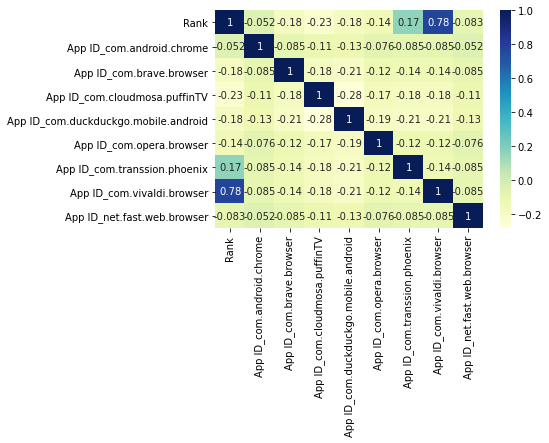

In [40]:
sns.heatmap(df3.corr(),annot=True,cmap ="YlGnBu")

# here keyword rankings is strongly correlated with App ID_com.vivaldi.browser.

# part=2

# Q1. Write about any difficult problem that you solved. (According to us difficult - is something which 90% of people would have only 10% probability in getting a similarly good solution). 

# ans = I have done one project related to stock price prediction.Here I Forecasted the close price of different stocks using MACD, signal  as a technical indicator.

# Q2.Formally, a vector space V' is a subspace of a vector space V if V' is a vector space every element of V′ is also an element of V.


# ans = The set of pairs (a, 2a) for all real a
